# **Install Tensor Flow in this session and import libraries**

In [1]:
!pip install tensorflow

In [2]:
! pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [3]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
#Check tf.keras version
print(tf.keras.__version__)

2.5.0


# **LOAD MNIST FASHION DATA and PRE-PROCESSING**

In [4]:
fashion_mnist_data = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist_data.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

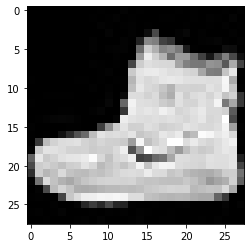

In [7]:
# View sample image from X_train

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('sample_train.jpg',X_train[0])
sample_pic_train = cv2.imread('sample_train.jpg')
plt.imshow(sample_pic_train)

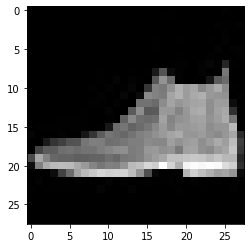

In [8]:
# View sample image from X_test
cv2.imwrite('sample_test.jpg',X_test[0])
sample_pic_test = cv2.imread('sample_test.jpg')
plt.imshow(sample_pic_test)

**Convert Datatype to float for processing in neural network**

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Normalise data to be in range from 0 to 1 by dividing by 255**

Reason - Maximum value of a pixel is 255

In [10]:
X_train = X_train/255
X_test = X_test/255

**Flatten the data** - 28 * 28 **to** 784

In [11]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


**Encode the Dependant Variable**

In [12]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

# **Builing the Deep learning Model**

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

**Singlelayer Perceptron**

In [14]:
model_single_layer = Sequential()
model_single_layer.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [15]:
# Compile the model

model_single_layer.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model

training_single_layer = model_single_layer.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.7883 - accuracy: 0.7436 - val_loss: 0.5754 - val_accuracy: 0.8046
Epoch 2/30
375/375 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.8215 - val_loss: 0.5072 - val_accuracy: 0.8282
Epoch 3/30
375/375 [==============================] - 1s 1ms/step - loss: 0.4912 - accuracy: 0.8349 - val_loss: 0.4805 - val_accuracy: 0.8378
Epoch 4/30
375/375 [==============================] - 1s 1ms/step - loss: 0.4646 - accuracy: 0.8429 - val_loss: 0.4667 - val_accuracy: 0.8388
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.8460 - val_loss: 0.4556 - val_accuracy: 0.8444
Epoch 6/30
375/375 [==============================] - 1s 1ms/step - loss: 0.4378 - accuracy: 0.8517 - val_loss: 0.4427 - val_accuracy: 0.8478
Epoch 7/30
375/375 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.8532 - val_loss: 0.4370 - val_accuracy: 0.8515
Epoch 

In [17]:
test_loss_single, test_acc_single = model_single_layer.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_single )

313/313 [==============================] - 0s 718us/step - loss: 0.4414 - accuracy: 0.8439
Test accuracy: 0.8439000248908997


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


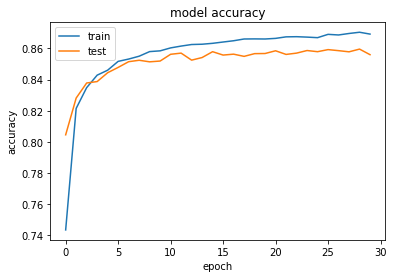

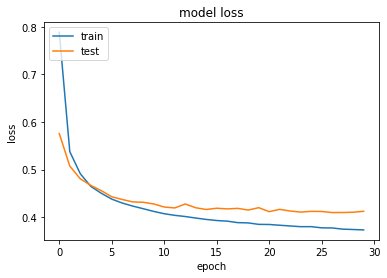

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training_single_layer
print(training_single_layer.history.keys())
# summarize training_single_layer for accuracy
plt.plot(training_single_layer.history['accuracy'])
plt.plot(training_single_layer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training_single_layer.history['loss'])
plt.plot(training_single_layer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Multilayer Perceptron**

In [19]:
model_multi_layer = Sequential()

# Input Layer
model_multi_layer.add(Dense(512, input_shape = (784,),activation = 'relu', name = 'Input_Layer'))
model_multi_layer.add(Dropout(0.4))

# Hidden Layer 1
model_multi_layer.add(Dense(512, name='Hidden_Layer_1', activation='relu'))
model_multi_layer.add(Dropout(0.4))

# Hidden Layer 2
model_multi_layer.add(Dense(512, name='Hidden_Layer_2', activation='relu'))
model_multi_layer.add(Dropout(0.4))

# Hidden Layer 3
model_multi_layer.add(Dense(512, name='Hidden_Layer_3', activation='relu'))
model_multi_layer.add(Dropout(0.4))

# Output Layer 
model_multi_layer.add(Dense(10,name = 'Output_Layer', activation = 'softmax'))

*Adam Optmiser*

In [20]:
# Compile the model with Adam

model_multi_layer.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Train the model

training_multi_layer = model_multi_layer.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 13ms/step - loss: 0.7005 - accuracy: 0.7436 - val_loss: 0.4612 - val_accuracy: 0.8368
Epoch 2/30
375/375 [==============================] - 5s 13ms/step - loss: 0.4860 - accuracy: 0.8256 - val_loss: 0.4040 - val_accuracy: 0.8558
Epoch 3/30
375/375 [==============================] - 5s 13ms/step - loss: 0.4410 - accuracy: 0.8426 - val_loss: 0.3989 - val_accuracy: 0.8594
Epoch 4/30
375/375 [==============================] - 5s 13ms/step - loss: 0.4216 - accuracy: 0.8473 - val_loss: 0.3652 - val_accuracy: 0.8694
Epoch 5/30
375/375 [==============================] - 5s 13ms/step - loss: 0.4066 - accuracy: 0.8573 - val_loss: 0.3724 - val_accuracy: 0.8670
Epoch 6/30
375/375 [==============================] - 5s 13ms/step - loss: 0.3909 - accuracy: 0.8601 - val_loss: 0.3543 - val_accuracy: 0.8736
Epoch 7/30
375/375 [==============================] - 5s 13ms/step - loss: 0.3812 - accuracy: 0.8624 - val_loss: 0.3589 - val_accuracy: 0.8681

In [22]:
test_loss, test_acc = model_multi_layer.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8807
Test accuracy: 0.8806999921798706


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


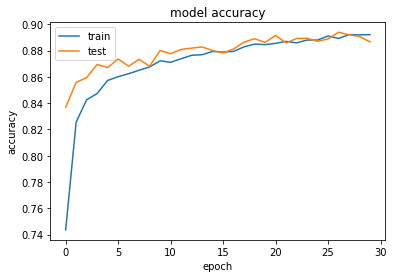

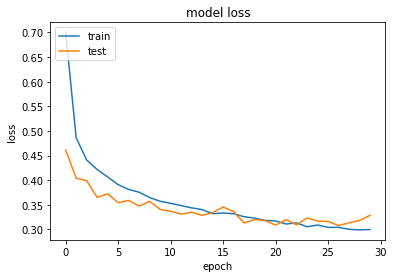

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training_multi_layer
print(training_multi_layer.history.keys())
# summarize training_multi_layer for accuracy
plt.plot(training_multi_layer.history['accuracy'])
plt.plot(training_multi_layer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training_multi_layer.history['loss'])
plt.plot(training_multi_layer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*SGD Optimiser*

In [28]:
# Compile the model with SGD

model_multi_layer.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Train the model

training_multi_layer = model_multi_layer.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 5s 13ms/step - loss: 0.2656 - accuracy: 0.9028 - val_loss: 0.2992 - val_accuracy: 0.8951
Epoch 2/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2590 - accuracy: 0.9050 - val_loss: 0.2972 - val_accuracy: 0.8967
Epoch 3/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2524 - accuracy: 0.9074 - val_loss: 0.2961 - val_accuracy: 0.8970
Epoch 4/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2515 - accuracy: 0.9084 - val_loss: 0.2962 - val_accuracy: 0.8973
Epoch 5/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2489 - accuracy: 0.9091 - val_loss: 0.2951 - val_accuracy: 0.8965
Epoch 6/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2478 - accuracy: 0.9104 - val_loss: 0.2946 - val_accuracy: 0.8969
Epoch 7/30
375/375 [==============================] - 5s 12ms/step - loss: 0.2444 - accuracy: 0.9100 - val_loss: 0.2944 - val_accuracy: 0.8975

In [30]:
test_loss, test_acc = model_multi_layer.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8928
Test accuracy: 0.892799973487854


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


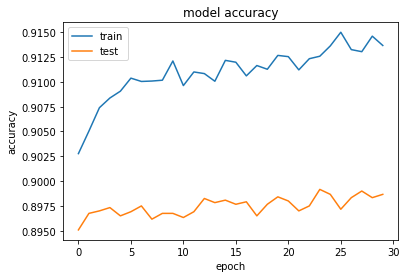

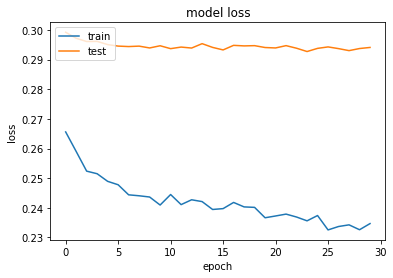

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training_multi_layer
print(training_multi_layer.history.keys())
# summarize training_multi_layer for accuracy
plt.plot(training_multi_layer.history['accuracy'])
plt.plot(training_multi_layer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training_multi_layer.history['loss'])
plt.plot(training_multi_layer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*RMSprop Optimiser*

In [32]:
# Compile the model with 

model_multi_layer.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Train the model

training_multi_layer = model_multi_layer.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2957 - accuracy: 0.8984 - val_loss: 0.3439 - val_accuracy: 0.8916
Epoch 2/30
375/375 [==============================] - 5s 15ms/step - loss: 0.3063 - accuracy: 0.8970 - val_loss: 0.3601 - val_accuracy: 0.8857
Epoch 3/30
375/375 [==============================] - 5s 15ms/step - loss: 0.3157 - accuracy: 0.8949 - val_loss: 0.3602 - val_accuracy: 0.8911
Epoch 4/30
375/375 [==============================] - 5s 15ms/step - loss: 0.3219 - accuracy: 0.8950 - val_loss: 0.3976 - val_accuracy: 0.8753
Epoch 5/30
375/375 [==============================] - 6s 15ms/step - loss: 0.3262 - accuracy: 0.8942 - val_loss: 0.4402 - val_accuracy: 0.8874
Epoch 6/30
375/375 [==============================] - 6s 15ms/step - loss: 0.3328 - accuracy: 0.8944 - val_loss: 0.3896 - val_accuracy: 0.8855
Epoch 7/30
375/375 [==============================] - 5s 15ms/step - loss: 0.3371 - accuracy: 0.8940 - val_loss: 0.4486 - val_accuracy: 0.8858

In [34]:
test_loss_rms, test_acc_rms = model_multi_layer.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_rms)

313/313 [==============================] - 1s 2ms/step - loss: 0.5191 - accuracy: 0.8714
Test accuracy: 0.871399998664856


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


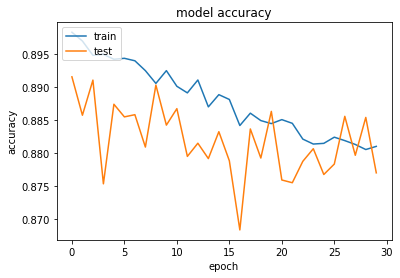

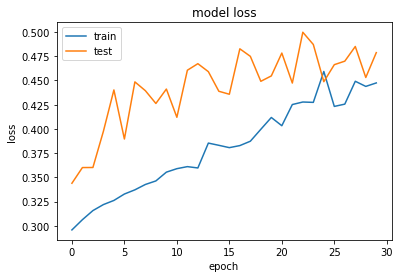

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training_multi_layer
print(training_multi_layer.history.keys())
# summarize training_multi_layer for accuracy
plt.plot(training_multi_layer.history['accuracy'])
plt.plot(training_multi_layer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training_multi_layer.history['loss'])
plt.plot(training_multi_layer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Summary**

**Question - What parameters should be chosen to classify the imagesinto various categories?**

Answer - 
1. Input layer with relu activation function, 512 Neurons and 40% dropouts
2. 3 Hidden Layers with relu activation and 512 Neurons and 40% dropouts
3. 1 Putput layer with softmax activation function and 10 Neurons
4. Compile with Adam Optimsier and categorical crossentropy
5. Train with batch_size=128, epochs=30, validation_split=0.2

We get accuracy of .88